Found 697 files belonging to 7 classes.
1/1 [==============================] - 0s 99ms/step


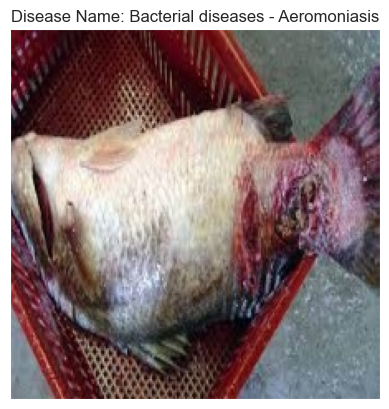

Disease Name: Bacterial diseases - Aeromoniasis
Cause: Infestation by the protozoan para- site Epistylis sp
Treatment: Pimafix often combined with Melafix


In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import cv2
import os
import csv


cnn = tf.keras.models.load_model('C:/Fish Disease Detection/fish_disease_detection_model.keras', compile=False)

validation_set = tf.keras.utils.image_dataset_from_directory('C:/Fish Disease Detection/Dataset/Test',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(224, 224),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names

optimizer = tf.keras.optimizers.Adam()

cnn.compile(optimizer=optimizer,
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

path = 'C:/Fish Disease Detection/Test_Images'
image = os.listdir(path)
path = path + '/' + image[0]

img = cv2.imread(path)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])

image = tf.keras.preprocessing.image.load_img(path,target_size=(224, 224))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])
predictions = cnn.predict(input_arr)

result_index = np.argmax(predictions)
model_prediction = class_name[result_index]
plt.imshow(img)
plt.title(f"Disease Name: {model_prediction}")
plt.xticks([])
plt.yticks([])
plt.show()


def get_disease_info(disease_name):
    disease = []
    trt = 'C:/Fish Disease Detection/Treatment.csv'
    with open(trt) as trt:
        reader = csv.reader(trt, delimiter=',')
        next(reader)
        for row in reader:
            disease.append(row)
    for row in disease:
        if disease_name == row[0]:
            if disease_name == 'Healthy Fish':
                print('Healthy Fish')
            else:
                print(f'Disease Name: {disease_name}')
                print(f'Cause: {row[1]}')
                print(f'Treatment: {row[2]}')


disease_name = class_name[result_index]

get_disease_info(disease_name)

os.remove(path)

